In [5]:
%matplotlib inline

In [6]:
import pandas as pd
import datetime

In [349]:
IDENTIFIER = 205
df = pd.read_csv('vw_data/%s/turnSensors.csv' % IDENTIFIER, sep=",", header=None)
df.columns = ["Heading", "Velocity"]
dfLatLong = pd.read_csv('vw_data/%s/latlong.csv' % IDENTIFIER, sep=",", header=None)
dfLatLong.columns = ["Lat", "Long"]
dfLatLong[(dfLatLong["Lat"]<0)] = float('nan')
dfLatLong.fillna(inplace=True, method="ffill")

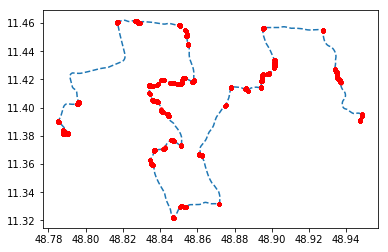

             Lat       Long
35995  48.787864  11.383891
35996  48.787864  11.383891
35997  48.787864  11.383891
35998  48.787864  11.383891
35999  48.787864  11.383891


In [465]:
TURN_RADIUS = 20
TURN_SHIFT = 30
df5 = ((abs(df['Heading'] - df['Heading'].shift(-1 * TURN_SHIFT)) > TURN_RADIUS) | (abs(df['Heading'] - df['Heading'].shift(TURN_SHIFT)) > TURN_RADIUS)) 
turnVals = dfLatLong[df5]
import matplotlib.pyplot as plt
plt.plot(dfLatLong["Lat"].values, dfLatLong["Long"].values, "--")
plt.plot(turnVals["Lat"].values, turnVals["Long"].values, "ro", markersize="3")
plt.show()
print (dfLatLong.tail())

In [371]:
resultDf = pd.read_csv('vw_data/%s/0.6/assign.out' % IDENTIFIER, sep=",", header=None)
resultDf.columns=["Assignment"]


In [448]:
import pickle
f = open('vw_data/%s/0.6/motifs.pkl' % IDENTIFIER, "rb")
motifs = pickle.load(f)
print(motifs)
m = (6, 7, 0)
motifIndices = motifs[m]
print(sorted(list(motifIndices)))


{(4, 3, 4, 3, 2): {(22400, 22976), (2928, 3594), (12147, 12962), (21152, 21385), (20454, 20910), (7503, 7628), (15145, 16109), (24356, 25193), (2819, 2912), (19184, 19614), (5900, 6282), (31537, 31963), (9445, 9771), (5023, 5722), (9861, 11023), (21386, 22260), (6283, 6677), (18042, 18790), (29622, 29962), (19016, 19183), (1878, 2818), (20194, 20374), (4594, 5022), (26438, 28910)}, (6, 7, 0): {(22261, 22350), (11543, 11632), (898, 969), (26318, 26437), (1301, 1430), (6789, 6865), (32373, 32438), (31990, 32091), (14271, 14383), (13143, 13346), (18791, 18866), (24252, 24355), (29980, 30082), (9305, 9402), (5723, 5788), (9030, 9164), (17948, 18041), (31430, 31536), (8176, 8295)}}
[(898, 969), (1301, 1430), (5723, 5788), (6789, 6865), (8176, 8295), (9030, 9164), (9305, 9402), (11543, 11632), (13143, 13346), (14271, 14383), (17948, 18041), (18791, 18866), (22261, 22350), (24252, 24355), (26318, 26437), (29980, 30082), (31430, 31536), (31990, 32091), (32373, 32438)]


In [373]:
def collapse(df, gap=None):
    if gap is not None:
        indivFrame = df[gap[0]: gap[1]+1]
    else:
        indivFrame = df
    values = indivFrame.values.T.flatten()
    prev = values[0]
    result = [str(prev)]
    for v in values:
        if v != prev:
            result.append(str(v))
            prev = v
    return result

In [450]:
oldDf = pd.read_csv('vw_data/%s/old/assign.out' % IDENTIFIER, sep=",", header=None)
oldDf.columns=["Assignment"]
totalLen = oldDf.count().values[0]
collapseWindow = collapse(oldDf)
concatenated = ''.join([str(i) for i in collapseWindow])
concatMotif = ''.join([str(i) for i in m])

print(concatenated.count(concatMotif))
        

correct = 0
motifFound = []
for start, end in motifIndices:
    result = collapse(oldDf, (start, end))
    resultStr = ''.join(result)
    if concatMotif in resultStr:
        correct += 1
        motifFound.append((start, end))
    print(result, start, end)
print(correct, len(motifIndices))

11
['6', '0'] 22261 22350
['6', '7', '0'] 11543 11632
['6', '7', '0'] 898 969
['7', '0'] 26318 26437
['6', '7', '0'] 1301 1430
['6', '7', '0'] 6789 6865
['6', '7'] 32373 32438
['5', '7'] 31990 32091
['2', '7', '0'] 14271 14383
['5', '6', '7', '0', '4'] 13143 13346
['6', '7', '0', '4'] 18791 18866
['2', '7', '0'] 24252 24355
['5', '7', '0', '1'] 29980 30082
['6', '7', '0'] 9305 9402
['6', '7', '0'] 5723 5788
['2', '5', '6', '7', '0'] 9030 9164
['6', '7', '0'] 17948 18041
['7', '0'] 31430 31536
['6', '7', '0'] 8176 8295
11 19


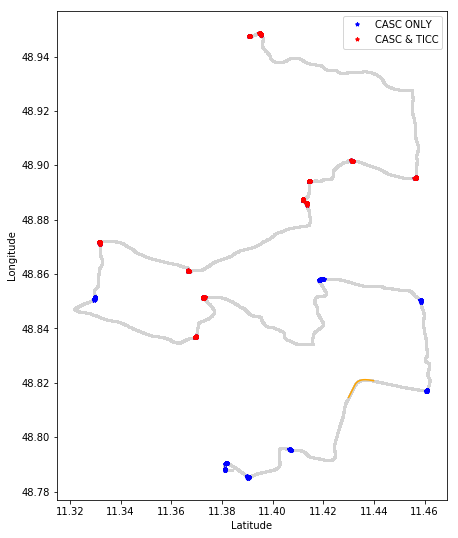

In [489]:
colors = ["r", "b", "g", "orange", "c", "y", "magenta", "brown", "gray"]
# subset = (((dfLatLong["Lat"] > 48.89)) & (dfLatLong["Lat"] < 48.904))

useOffsets = False

plt.figure(1, figsize=[7,9])
for i in range(8):
    indices = resultDf["Assignment"] == i
    latLong = dfLatLong[indices]
    plt.plot(latLong["Long"].values, latLong["Lat"].values, "o", markersize=2, color="lightgray")
    
for i, gap in enumerate(motifIndices):
    latLong = dfLatLong[gap[0]:gap[1]+1]
    label = "CASC ONLY" if i == 0 else None
    plt.plot(latLong["Long"].values, latLong["Lat"].values, "*", markersize=4, color="blue", label=label)

for i, gap in enumerate(motifFound):
    latLong = dfLatLong[gap[0]:gap[1]+1]
    label = "CASC & TICC" if i == 0 else None
    plt.plot(latLong["Long"].values, latLong["Lat"].values, "*", markersize=4, color="red", label=label)

    
# glat, glong = 27250, 27805
# plt.plot(dfLatLong[glat:glong]["Long"].values, dfLatLong[glat:glong]["Lat"].values, color="orange")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
# plt.xlim(xmin=48.89, xmax=48.904)
# plt.ylim(ymin=11.41, ymax=11.46)
plt.legend()
plt.show()

# subsetResult = result
# print(dfLatLong["Lat"] < 48.89) & (dfLatLong["Lat"] > 48.904)

In [459]:
xmin = 48.93
xmax = 48.94
llx = (((dfLatLong["Lat"] > xmin)) & (dfLatLong["Lat"] < xmax))
ymin = 11.38
ymax = 11.42
lly = (((dfLatLong["Long"] > ymin)) & (dfLatLong["Long"] < ymax))
print (dfLatLong[llx & lly].index.values.tolist())

[1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050, 2051, 2052, 2053, 2054, 2055, 2056, 2057, 2058, 2059, 2060, 2061, 2062, 2063, 2064, 2065, 2066, 2067, 2068, 2069, 2070, 2071, 2072, 2073, 2074, 2075, 2076, 2077, 2078, 2079, 2080, 2081, 2082, 2083, 2084, 2085, 2086, 2087, 2088, 2089, 2090, 2091, 2092, 2093, 2094, 2095, 2096, 2097, 2098, 2099, 2100, 2101, 2102, 2103, 2104, 2105, 2106, 2107, 2108, 2109, 2110, 2111, 2112, 2113, 2114, 2115, 2116, 2117, 2118, 2119, 2120, 2121, 2122, 2123, 2124, 2125, 2126, 2127, 2128, 2129, 2130, 2131, 2132, 2133, 2134, 2135, 2136, 2137, 2138, 2139, 2140, 2141, 2142, 2143, 2144, 2145, 2146, 2147, 2148, 2149, 2150, 2151, 2152, 2153, 215

['3']


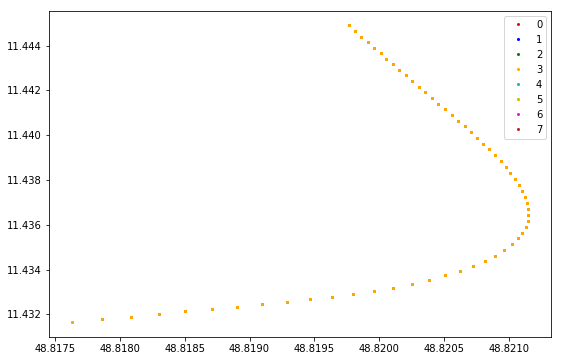

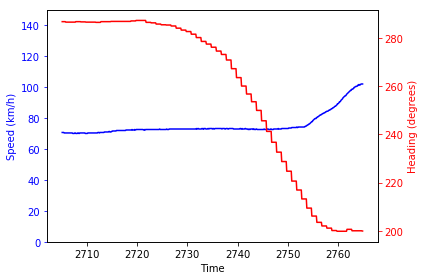

In [515]:
s,e = (27050, 27650)
# s,e = (1960, 2200)
ll = (((dfLatLong.index > s)) & (dfLatLong.index <e))
plt.figure(1, figsize=[9,6])

print(collapse(oldDf[ll]))

for i in range(8):
    indices = oldDf["Assignment"] == i
    latLong = dfLatLong[ll & indices]
    plt.plot(latLong["Lat"].values, latLong["Long"].values, "o", markersize=2, color=colors[i], label="%s" % i)

# plt.ylim(ymin=11.32, ymax=11.46)
plt.legend()
plt.show()


fig, ax1 = plt.subplots()
for i in range(8):
    indices = resultDf["Assignment"] == i
    ts = df[ll & indices]
    ax1.plot(ts.index/10.0, ts["Velocity"].values, "b-")
ax1.set_xlabel('Time')
ax1.set_ylabel('Speed (km/h)', color='b')
ax1.tick_params('y', colors='b')
ax1.set_ylim(bottom=0, top=150)

# ax1.ylim(ymin=0, ymax =120)
# ax1.ylabel("km/h")
# ax1.xlabel("Time")
# plt.legend()

ax2 = ax1.twinx()
for i in range(8):
    indices = resultDf["Assignment"] == i
    ts = df[ll & indices]
    ax2.plot(ts.index/10.0, ts["Heading"].values, "r-")
ax2.set_ylabel('Heading (degrees)', color='r')
ax2.tick_params('y', colors='r')

# plt.ylim(ymin=0, ymax =120)
# plt.ylabel("km/h")
# ax2.xlabel("Time")
# plt.legend()
# ax2.show()

fig.tight_layout()
plt.show()

['1', '2', '7', '0', '1', '4', '1', '4', '1']


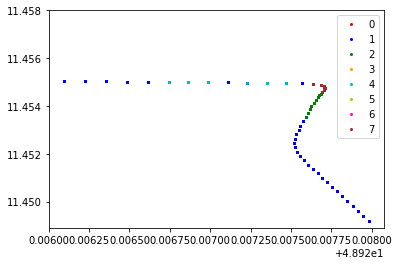

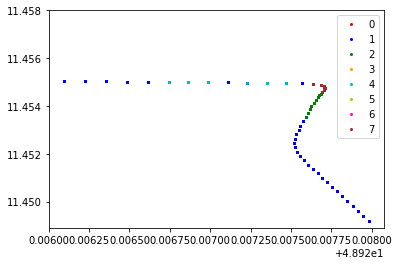

['1', '2', '7', '0', '1', '0', '1', '4', '1']


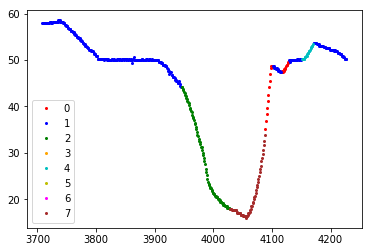

In [402]:
xmin = 48.926
xmax = 48.928
# ymin = 11.47
# ymax = 11.44

# xmin = 48.86
# xmax = 48.88
ll = (((dfLatLong["Lat"] > xmin)) & (dfLatLong["Lat"] < xmax))

print(collapse(oldDf[ll]))

for i in range(8):
    indices = oldDf["Assignment"] == i
    latLong = dfLatLong[ll & indices]
    plt.plot(latLong["Lat"].values, latLong["Long"].values, "o", markersize=2, color=colors[i], label="%s" % i)

plt.ylim(ymax=11.458)
plt.legend()
plt.show()

for i in range(8):
    indices = oldDf["Assignment"] == i
    latLong = dfLatLong[ll & indices]
    plt.plot(latLong["Lat"].values, latLong["Long"].values, "o", markersize=2, color=colors[i], label="%s" % i)

plt.ylim(ymax=11.458)
plt.legend()
plt.show()


# for i in range(8):
#     indices = oldDf["Assignment"] == i
#     latLong = dfLatLong[ll & indices]
#     plt.plot(latLong["Lat"].values, latLong["Long"].values, "o", markersize=2, color=colors[i], label="%s" % i)

# plt.ylim(ymax=11.458)
# plt.legend()
# plt.show()

print(collapse(resultDf[ll]))

for i in range(8):
    indices = resultDf["Assignment"] == i
    ts = df[ll & indices]
    plt.plot(ts.index, ts["Velocity"].values, "o", markersize=2, color=colors[i], label="%s" % i)

# plt.ylim(ymax=11.458)
plt.legend()
plt.show()


# plt.plot(positions["Lat"].values, positions["Long"].values, color=colors[assigns])
# plt.show()

['2', '5', '6', '7', '0', '4']


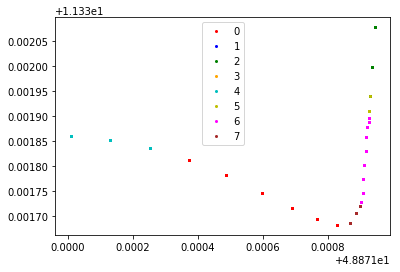

['2', '5', '6', '7', '0']


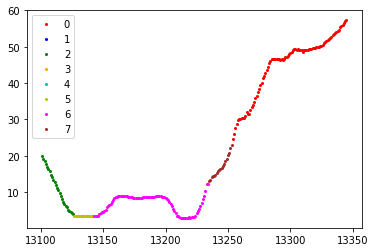

In [404]:
# s, e = (22200, 22350)
# s, e = (24200, 24355)
s,e = (13100, 13346)
ll = (((dfLatLong.index > s)) & (dfLatLong.index <e))

print(collapse(oldDf[ll]))

for i in range(8):
    indices = oldDf["Assignment"] == i
    latLong = dfLatLong[ll & indices]
    plt.plot(latLong["Lat"].values, latLong["Long"].values, "o", markersize=2, color=colors[i], label="%s" % i)

# plt.ylim(ymax=11.458)
plt.legend()
plt.show()

print(collapse(resultDf[ll]))

for i in range(8):
    indices = resultDf["Assignment"] == i
    ts = df[ll & indices]
    plt.plot(ts.index, ts["Velocity"].values, "o", markersize=2, color=colors[i], label="%s" % i)

plt.legend()
plt.show()


# plt.plot(positions["Lat"].values, positions["Long"].values, color=colors[assigns])
# plt.show()
